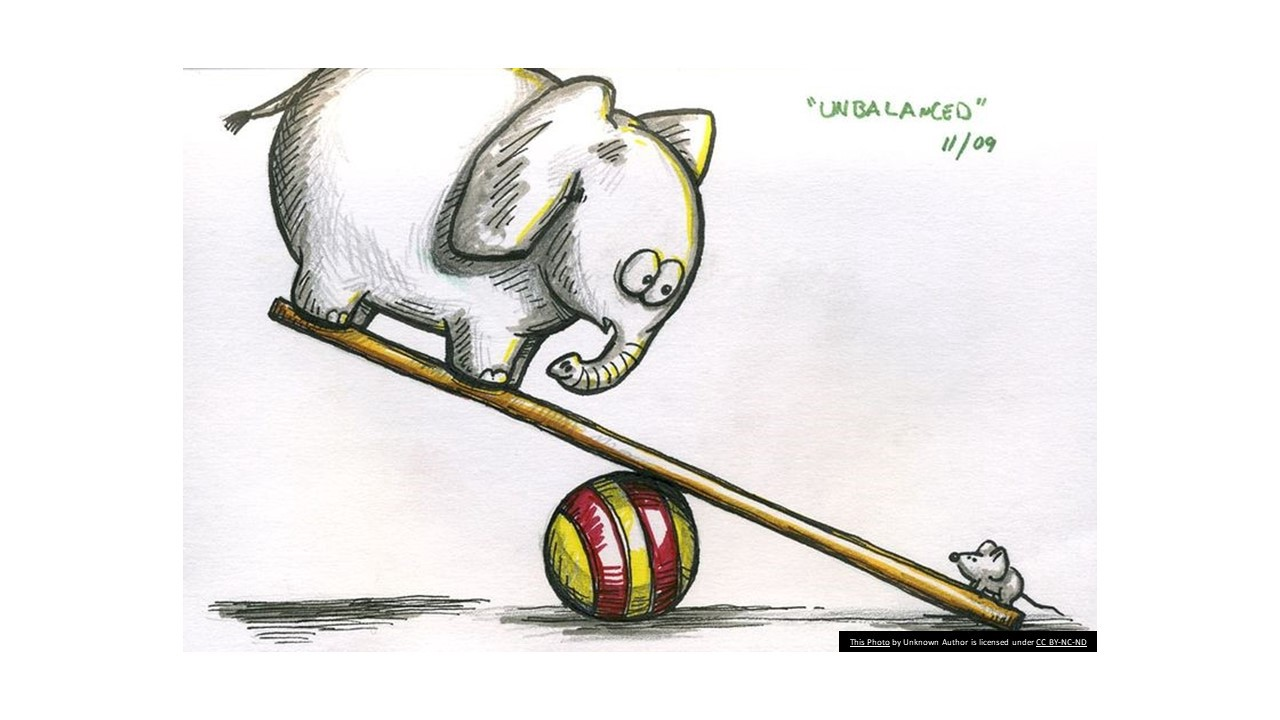

## What is Imbalance distribution in Machine Learning?

This problem generally occurs in classification. In general when classes are not represented equally then we call it imbalance distribution. In real life maximum problem we face are imbalance problem like frud detection, disease detection, spam filtering, click prediction etc. In frud detection dataset `not fraud` samples are lot more than `fraud`. It creats a imbalance. Let's visualize what imbalace distribution looks like using `ucl-statistics` dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#ignore all warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../input/ucl-statistics/ucl_stats.csv')
#creating x and y matrix of features
x1 = df.iloc[:, 2: -1]
y1 = df.iloc[:, -1]
print("Original values in ucl data: %s" % Counter(y1))

fig = sns.countplot(x = 'champions', data = df)
fig.set_xticklabels(labels=['Not Champion', 'Champion'])
plt.xlabel('');

We have 692 samples in Not Champion class and only 28 samples in Champion class. So clearly we are dealing with a imbalanced dataset. There are two types of imbalance.

    1. Slight imbalance
    
    2. Severe imbalance
    
#### Slight imbalance: 
When the ratio of two sample is 6:4 in trainning set then the dataset is slightly imbalance.

#### Severe imbalance:
When the ration is 100:1 or 1000:1 or even more than it is severely imbalance.


## What happens when we apply ML on Imbalanced dataset!

In [ ]:
#splitting to train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 7)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 31)

# Fit random hyperparameter search model
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

print("Model accuracy in ucl data without dealing with Imbalance problem is: " + str(round((score * 100), 2)) + '%')

**95.56% accuracy!**

But this is no what we desier. Let's first see the classification report.

In [ ]:
#making prediction
y_preds = clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

Our model is doing well in `Not champion` class. It predict with 98% accuray in this class. But look at the `Champion` class! The model is failling horribly here. Precision is only 50%. Our overall score 95.56% is totally useless cause the model only predicting `Not Champion` class accurately. 

#### Why this is happening?

Because most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

#### How can we solve this?

Ther are some common ways:

    1. Collecting more data
    
    2. Trying Different Perspective
    
    3. Sampling
    
    
#### Collecting more data: 

Collecting more data could balance any dataset. So, first you should try collect more data if it is possible.

#### Trying different perspective:

As I said before, most machine learning algorithms work best when the number of samples in each class are about equal. There are other field of Machine Learning which are dedicated to Imbalance datasets like [Anomoly detection](https://en.wikipedia.org/wiki/Anomaly_detection). Anomoly detection identify rare events, items, observation which are suspiciously different from majority of data. Another is [Change detection](https://en.wikipedia.org/wiki/Change_detection) which is pretty similar to  anomoly detection. We can't apply these methods in this dataset because `Champions` classes are not rare. Finalist teams stats are similar. We need another technique and that is sampling.

#### Sampling:
There are three types of sampling.
     
     1. Under-sampling
     
     2. Over-sampling
     
     3. Combine-sampling
  
#### Under-sampling:

    
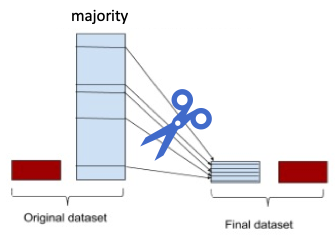

The above figure of under-sampling is self explanetory. In this process we cut out some samples from the majority class and it balances the dataset. But this technique is not suggested for small severe imbalanced dataset because important samples can be removed and the model will perform badly on both class but this technique can be useful for very large dataset.

Let's see udersampling in action using `creditcard` dataset.


In [ ]:
df2 = pd.read_csv('../input/creditcardfraud/creditcard.csv')

x2 = df2.drop("Class",axis=1)
y2 = df2['Class']

print("Original values in creditcard data: %s" % Counter(y2))

#applying under sampling
from imblearn.under_sampling import RandomUnderSampler
random_under_sample = RandomUnderSampler(random_state=42)
x_new, y_new = random_under_sample.fit_resample(x2, y2)
print("Values after applying undersampling: %s" % Counter(y_new))

#plotting
fig, axarr = plt.subplots(1, 2, figsize = (8, 4))
df2.Class.value_counts().plot.bar(ax=axarr[0])
y_new.value_counts().plot.bar(ax=axarr[1])
axarr[0].set_title("Before Undersampling")
axarr[1].set_title("After Undersampling");

There is a parametere called `sampling_strategy` by which we can obtain desired ratio of samples. Let's see this in action..

In [ ]:
print("Original values in creditcard data: %s" % Counter(y2))

random_under_sample = RandomUnderSampler(sampling_strategy = 0.5, random_state=42)
x_with_ratio, y_with_ratio = random_under_sample.fit_resample(x2, y2)
print("Values after applying undersampling with ration 0.5: %s" % Counter(y_with_ratio))

#plotting
fig, axarr = plt.subplots(1, 2, figsize = (8, 4))
df2.Class.value_counts().plot.bar(ax=axarr[0])
y_with_ratio.value_counts().plot.bar(ax=axarr[1])
axarr[0].set_title("Before Undersampling")
axarr[1].set_title("After Undersampling with ratio 0.5");

There are other under-sampling algorithms you can find [here](https://imbalanced-learn.org/stable/references/under_sampling.html)

#### Over-sampling:
Over-sampling uses various techniques to increases number of samples in minority class. Under-sampling reduces samples in majority class and over-sampling increases samples in minority class. Over-sampling is more reliable over under-sampling.

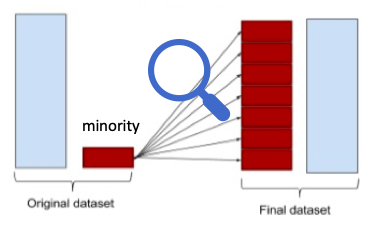

The best technique for oversampling is SMOTE(Synthetic Minority Oversampling Technique). It uses K-neighbors methods to detemine new samples. You can learn more about Smote [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

Let's balance our `ucl-stats` dataset using SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

#applying smote
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x1, y1)

print("Original values in ucl data: %s" % Counter(y1))

print("Values after applying oversampling: %s" % Counter(y_sm))

#plotting
fig, axarr = plt.subplots(1, 2, figsize = (8, 4))
df.champions.value_counts().plot.bar(ax=axarr[0])
y_sm.value_counts().plot.bar(ax=axarr[1])
axarr[0].set_title("Before Oversampling")
axarr[1].set_title("After Oversampling");

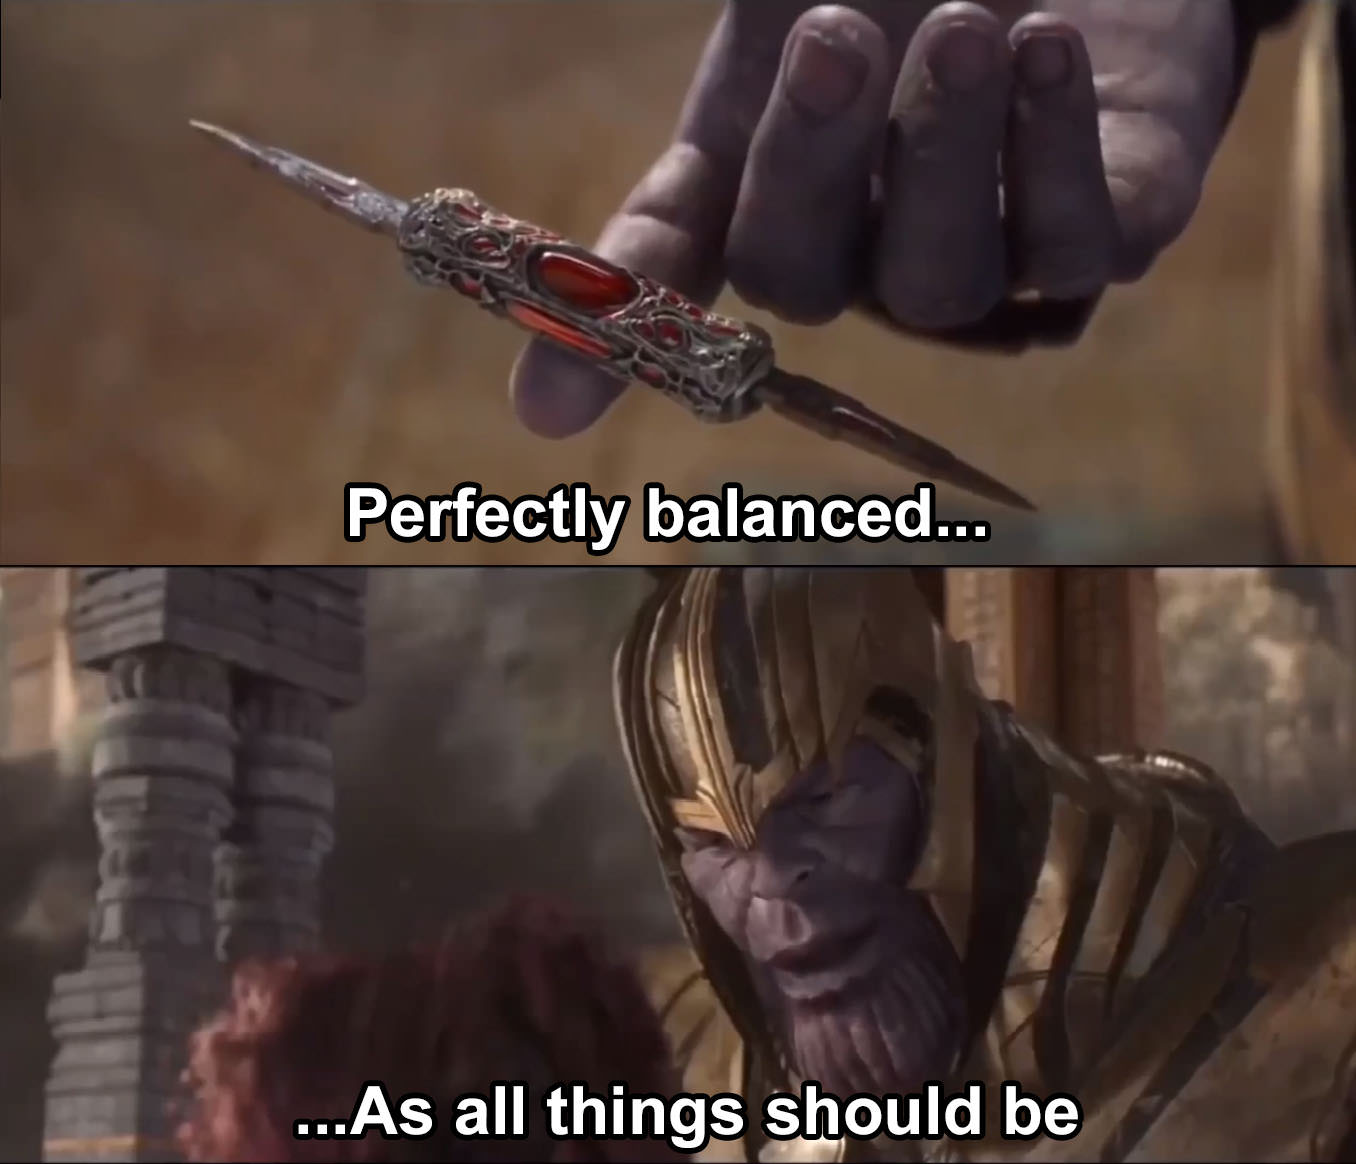

In [ ]:
#applying ml on balanced data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 7)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 31)

# Fit random hyperparameter search model
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

print("Model accuracy in ucl data after applying SMOTE technique is: " + str(round((score * 100), 2)) + '%')

In [ ]:
y_preds = clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

**Great result!** precision in `minority claas` increased dramatically. Overall accuracy also increased.

There are some other algorithms for over-sampling like [SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC), [ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html#imblearn.over_sampling.ADASYN), [BorderlineSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html#imblearn.over_sampling.BorderlineSMOTE) etc. You can find detail about all of them [here](https://imbalanced-learn.org/stable/references/over_sampling.html). You can also check out this paper [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf).

#### Combining Over-sampling and Under-sampling:

SMOTE technique sometime generate noisy samples. This problem can be solved using combined algorithms like [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html#imblearn.combine.SMOTEENN) and [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek). SMOTEENN is the combination of SMOTE(Synthetic Minority Oversampling Technique) and ENN(Edited Nearest Neighbours). This algorithm use SMOTE to increase samples and use ENN to remove noisy samples.

In [ ]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42)
x_res, y_res = sme.fit_resample(x1, y1)

print("Original values in ucl data: %s" % Counter(y1))

print("Values after applying combinesampling: %s" % Counter(y_res))

#plotting
fig, axarr = plt.subplots(1, 2, figsize = (8, 4))
df.champions.value_counts().plot.bar(ax=axarr[0])
y_res.value_counts().plot.bar(ax=axarr[1])
axarr[0].set_title("Before combinesampling")
axarr[1].set_title("After aftersampling");

Let's apply machine learning on this..

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.25, random_state = 7)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 31)

# Fit random hyperparameter search model
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

print("Model accuracy after applying Combine-sampling technique is: " + str(round((score * 100), 2)) + '%')

In [ ]:
y_preds = clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

Accuacy and precision is little low than SMOTE technique. So this case SMOTE technique is preferable.

#### Conclusion:

1. Imbalanced classification is the problem of classification when there is an unequal distribution of classes in the training dataset.
2. If possible try gather more data.
3. Under-sampling can be applied on large dataset.
4. Over-sampling is the best choice for small and medium datasets.
5. Must use classification report or cinfusion matrices to check result with imbalance dataset.
6. Try using tree based algorithms.
